In [1]:
from numpy.fft import rfft, rfftfreq, irfft, fftshift
from SFS.src.py.utils import *

$u = 0.0, N = 256, L = 64.0, T=0.1, t=1e+05 $
$u = 0.0, N = 256, L = 64.0, T=0.1, t=1e+06 $


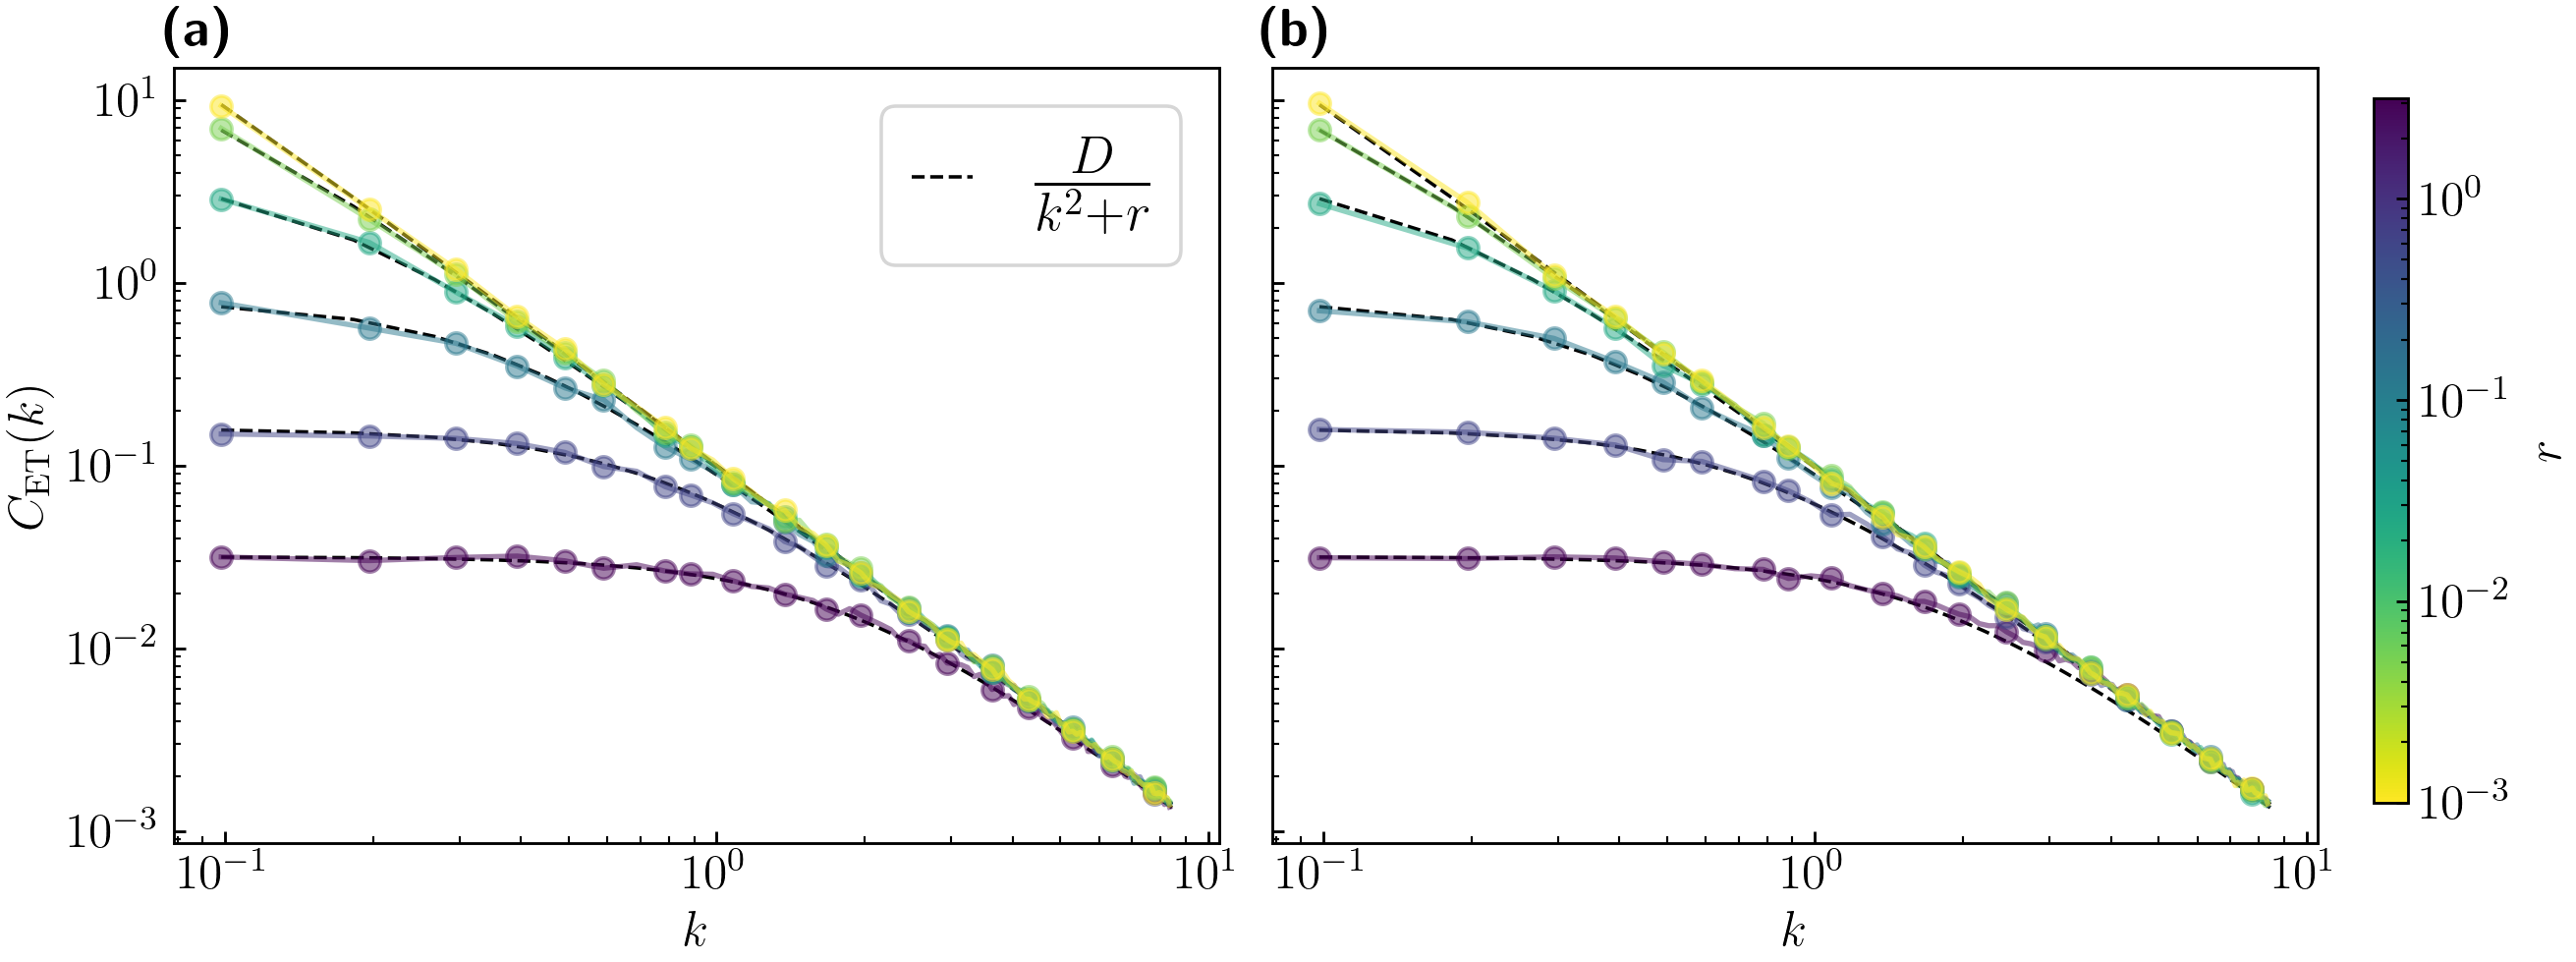

In [2]:
fig, ax = plt.subplots(1, 2, figsize=(11,4), sharey=True)

for j, number in enumerate([1, 2]):

    folder = "data/SETD_paper/{number}/".format(number = number)
    n = count_files(folder) 
    time = get_time(folder + "1/")

    rr = []
    for i in range(n):
        seed = i + 1
        q, Cq, con, T, L, N, dt = get_Cq_saved(folder, seed=seed)
        Cq = np.mean(Cq, axis=0)

        AA = (len(q)*2)//3
        r = con["r"]
        rr.append(r)

        color = cm.viridis(i/(n-1))

        ax[j].loglog(q[1:AA], np.real(Cq[1:AA, 0, 0]), '-', lw=1.5,  color=color, zorder=2, alpha=.5)
        ax[j].loglog(logspaced(q[1:AA]), logspaced(np.real(Cq[1:AA, 0, 0])), '.', ms=12,  color=color, zorder=2, alpha=.5)

        q = np.linspace(q[1], q[AA], 100)
        if i == 0: ax[j].loglog(q, T / (q**2 + r), 'k--', zorder=1, lw=1, label="$\\frac{D}{k^2 + r}$")
        else: ax[j].loglog(q, T / (q**2 + r), 'k--', zorder=1, lw=1)


    q, Cq, con, T, L, N, dt = get_Cq_saved(folder, seed=seed)
    u = con["u"]

    title = "$u = {u}, N = {N}, L = {L}, T={T}, t={t:1.0e} $".format(u=u,N=N,L=L, T=T,t=time[-1])
    print(title)
    
    ax[j].set_xlabel("$k$")
    if j==0:
        ax[j].set_ylabel("$C_\\mathrm{ET}(k)$")



cbar = fig.colorbar(
    cm.ScalarMappable(norm=colors.LogNorm(vmin=np.min(np.abs(rr)), vmax=np.max(np.abs(rr))), 
    cmap=cm.viridis_r), ax=ax, label="$r$",
    )

ax[0].legend(fontsize=22)
ax[0].tick_params(direction='in')
ax[0].tick_params(direction='in', which="minor")
ax[1].tick_params(direction='in')
ax[1].tick_params(direction='in', which="minor")
plt.subplots_adjust(wspace=0.05)
cbar.ax.set_position([0.92, 0.15, 0.02, 0.7])  # Adjust colorbar position [left, bottom, width, height]
label(ax)
fig.savefig("fig/fig1.pdf", bbox_inches="tight")
plt.show()